# Diabetes Dataset: MLP model

Oscar Miranda Escalante A01630791

In [71]:
# Set the current working directory (root of the repository)
CWD = '/Users/oscar/Local/regression/'

import sys
sys.path.append(CWD)

In [72]:
%ls CWD

ls: CWD: No such file or directory


In [73]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from modules.dataset import DiabetesDataset
from modules.models import MLP

torch.manual_seed(0)

In [74]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# force cpu (mps not compatible)
device = "cpu"

print(f"Using {device} device")

Using cpu device


## Load the data

In [75]:
path = f'{CWD}/data/diabetes.txt'
diabetes_dataset = DiabetesDataset(path=path, normalize=True)

# Train/test split
train_size = int(0.8 * len(diabetes_dataset))
test_size = len(diabetes_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(diabetes_dataset, [train_size, test_size])

## Model definition

In [76]:
# Feature dimensions
in_size = len(diabetes_dataset[0][0])
h_size = 64
out_size = 1

# Instantiate model
model = MLP(in_size, h_size, out_size).to(device)

## Training

In [77]:
def train(data, n_epochs, criterion, optimizer, loss_history):
    X_train, y_train = data[:]

    for epoch in range(n_epochs):
        optimizer.zero_grad()
        
        # Forward
        y_hat = model(X_train)

        # Loss
        loss = criterion(y_hat, y_train)
        loss_history.append(loss.item())

        # Gradients
        loss.backward()

        # Update params
        optimizer.step()

        print(f'epoch {epoch+1}, loss {loss.item()}')

Using SGD optimizer

In [78]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
mse_history = []

train(train_dataset, 100, criterion, optimizer, mse_history)


epoch 1, loss 28956.419921875
epoch 2, loss 28607.439453125
epoch 3, loss 28224.806640625
epoch 4, loss 27740.359375
epoch 5, loss 27116.04296875
epoch 6, loss 26325.447265625
epoch 7, loss 25351.640625
epoch 8, loss 24189.58984375
epoch 9, loss 22843.755859375
epoch 10, loss 21329.455078125
epoch 11, loss 19670.158203125
epoch 12, loss 17899.7890625
epoch 13, loss 16065.642578125
epoch 14, loss 14226.5625
epoch 15, loss 12452.4423828125
epoch 16, loss 10821.61328125
epoch 17, loss 9416.8125
epoch 18, loss 8308.7490234375
epoch 19, loss 7537.0908203125
epoch 20, loss 7099.27685546875
epoch 21, loss 6944.05810546875
epoch 22, loss 6983.26904296875
epoch 23, loss 7105.5078125
epoch 24, loss 7200.39306640625
epoch 25, loss 7182.240234375
epoch 26, loss 7011.28125
epoch 27, loss 6695.6982421875
epoch 28, loss 6274.3125
epoch 29, loss 5801.44384765625
epoch 30, loss 5331.3359375
epoch 31, loss 4907.271484375
epoch 32, loss 4558.50439453125
epoch 33, loss 4298.1591796875
epoch 34, loss 4124.

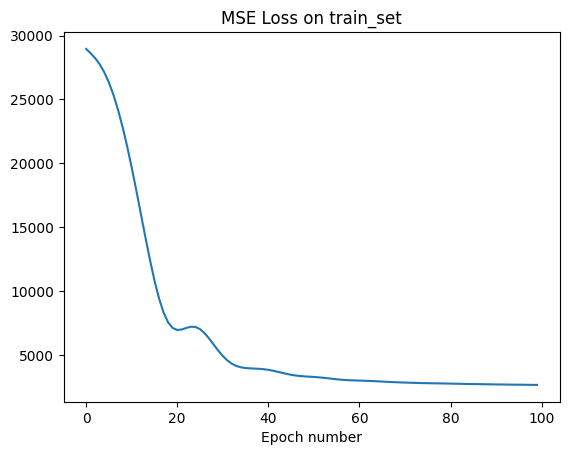

In [79]:
plt.title("MSE Loss on train_set")
plt.xlabel("Epoch number")
plt.plot(mse_history)

## Testing

Mean Squared Error (MSE) using test_set: 2407.3801
Root Mean Squared Error (RMSE) using test_set: 49.0651


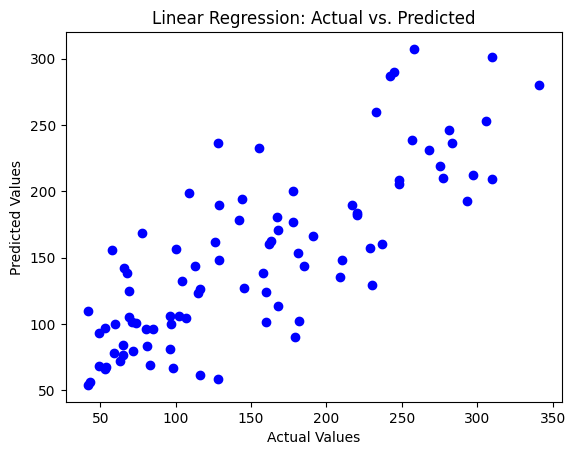

In [80]:
with torch.no_grad():
    X_test, y_test = test_dataset[:]
    y_hat = model(X_test)
    mse = criterion(y_hat, y_test)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE) using test_set: {mse.item():.4f}")
    print(f"Root Mean Squared Error (RMSE) using test_set: {rmse:.4f}")

    plt.scatter(y_test, y_hat, color='blue', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs. Predicted')
    plt.show()
    